In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from xgboost import XGBClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score

In [2]:
data = pd.read_excel("Financial_distress_data.xlsx").set_index(['Ticker', 'Year']).sort_index()

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2506.00,0.22,0.24,-0.95,0.06,0.19,0.37,0.96
X2,2525.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
X3,2524.00,0.08,0.09,-0.37,0.04,0.07,0.12,0.83
X4,2524.00,1.27,1.28,-0.05,0.52,0.97,1.58,12.63
X5,2524.00,0.06,0.08,-0.38,0.01,0.04,0.09,0.83
X6,2506.00,0.42,1.31,-7.97,0.04,0.15,0.41,27.92
X7,2524.00,0.16,0.80,-38.67,0.08,0.16,0.25,3.69
X8,2506.00,-0.01,0.96,-24.13,-0.05,0.00,0.06,12.08
X9,2480.00,4.94,0.96,0.79,4.32,4.93,5.62,7.84
X10,2050.00,0.90,0.79,-1.69,0.34,0.70,1.27,6.40


In [4]:
data.isnull().sum()

X1      19
X2       0
X3       1
X4       1
X5       1
X6      19
X7       1
X8      19
X9      45
X10    475
X11     19
X12     19
X13     68
X14     21
X15     36
X16     41
X17     21
X18      0
X19      1
X20      1
X21      1
dtype: int64

In [5]:
data = data.fillna(data.median())

In [6]:
data['S_score'] = 1.03*data['X1'] + 3.07*data['X3'] + 0.66*data['X6'] + 0.4*data['X4']

In [7]:
data['FDS'] = np.where((data['S_score'] < 0.862), 1, 0)

In [8]:
data.FDS.value_counts()

0    1560
1     965
Name: FDS, dtype: int64

In [9]:
data.groupby('Ticker').agg({'FDS': 'min'}).value_counts()

FDS
0      401
1      106
dtype: int64

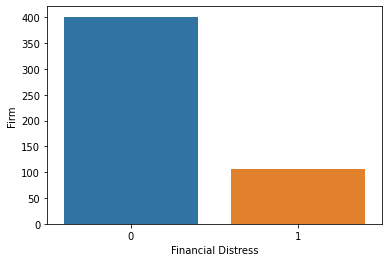

In [10]:
ax = sns.countplot(x = 'FDS', data = data.groupby('Ticker').agg({'FDS': 'min'}))
ax.set(xlabel='Financial Distress', ylabel='Firm')
plt.show()

In [11]:
df = data.drop(['X1', 'X3', 'X6', 'X4', 'S_score'], axis=1)

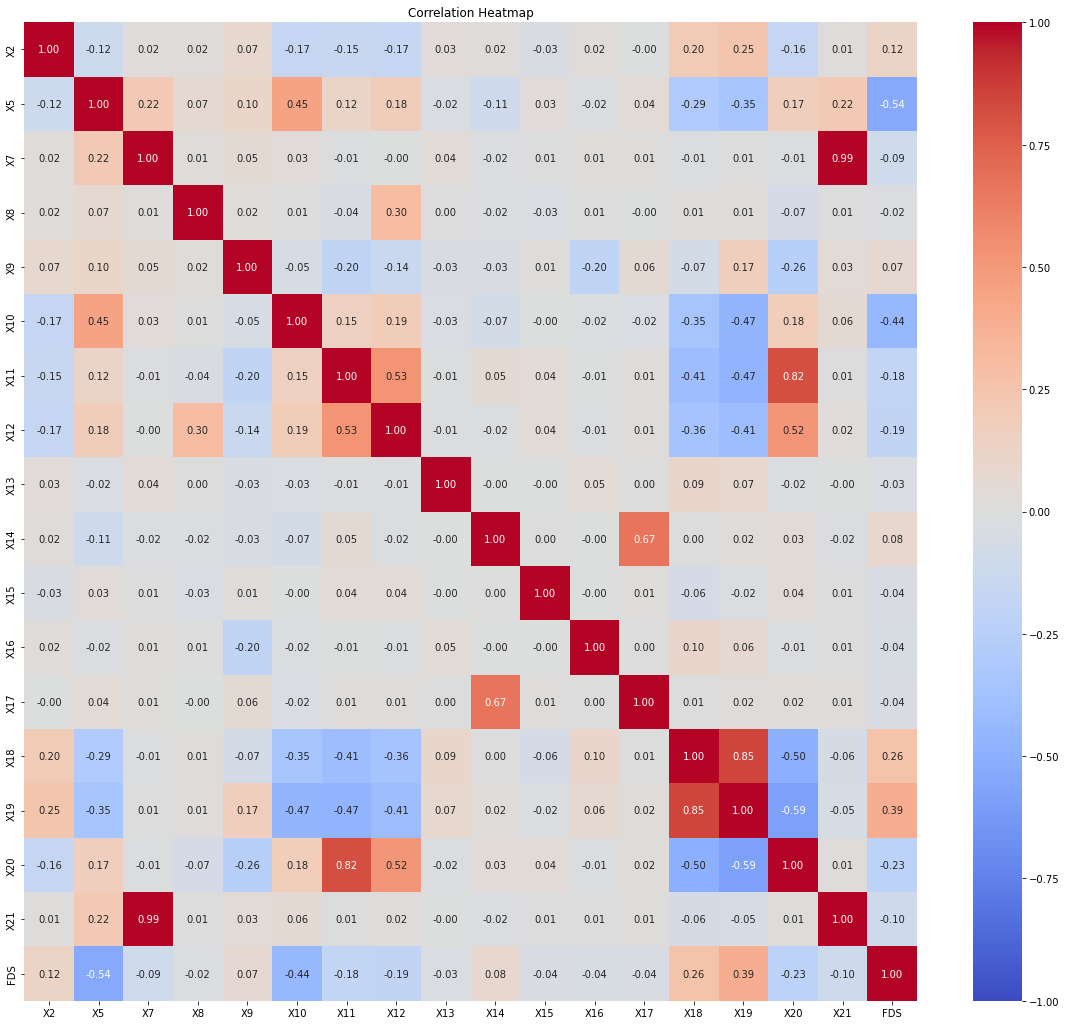

In [12]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap with the correlation coefficients
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
X_all = df.drop(['FDS'], axis=1)
y_all = df['FDS']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size= 0.2, random_state= 42)

## Logistic Regression

In [15]:
logr = LogisticRegression(random_state = 42)
logr.fit(X_train ,y_train)
print(classification_report(y_test, logr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       331
           1       0.60      0.70      0.65       174

    accuracy                           0.74       505
   macro avg       0.72      0.73      0.72       505
weighted avg       0.75      0.74      0.74       505



## XGBoost 

In [16]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       331
           1       0.92      0.95      0.94       174

    accuracy                           0.95       505
   macro avg       0.95      0.95      0.95       505
weighted avg       0.96      0.95      0.95       505



## Support Vector Machine

In [17]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train)
print(classification_report(y_test, SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       331
           1       0.77      0.84      0.80       174

    accuracy                           0.86       505
   macro avg       0.84      0.85      0.85       505
weighted avg       0.86      0.86      0.86       505



## Linear Discriminant Analysis

In [18]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
print(classification_report(y_test, LDA.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       331
           1       0.70      0.81      0.75       174

    accuracy                           0.82       505
   macro avg       0.80      0.82      0.80       505
weighted avg       0.83      0.82      0.82       505



## Random Forest

In [19]:
rf = RandomForestRegressor(max_depth = 20, n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
threshold = 0.5
y_pred = np.where(predictions >= threshold, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       331
           1       0.90      0.94      0.92       174

    accuracy                           0.94       505
   macro avg       0.93      0.94      0.94       505
weighted avg       0.94      0.94      0.94       505



In [20]:
# Visualize confusion matrix

def confusion_matrix_visualization(y_test, y_forecast):
    conf_matrix = confusion_matrix(y_test, y_forecast)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()  

# Type I error and Type II error of Logistic Regression

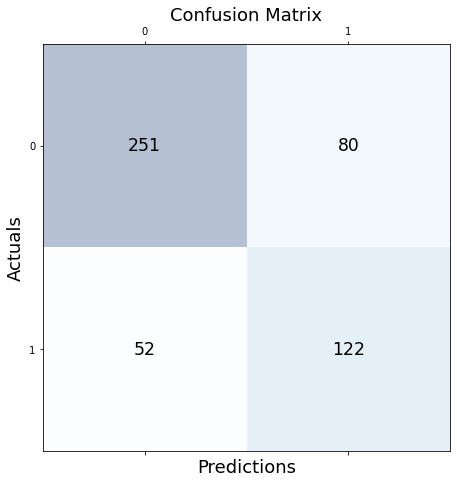

In [21]:
confusion_matrix_visualization(y_test, logr.predict(X_test))

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, logr.predict(X_test)).ravel()
# Type I error
type1_logr = 1- (tn / (tn+fp))

# Type II error
type2_logr = 1 - (tp / (tp+fn))

# Type I error and Type II error of XGBoost

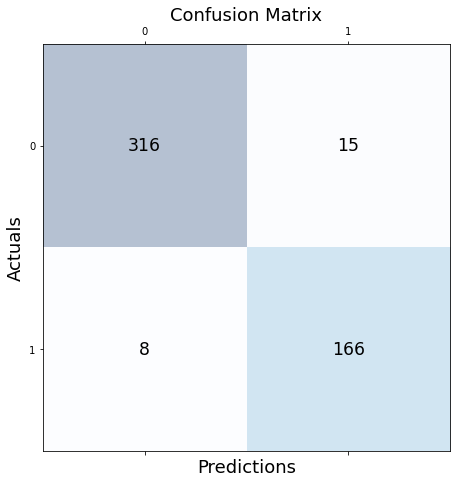

In [23]:
confusion_matrix_visualization(y_test, xgb.predict(X_test))

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, xgb.predict(X_test)).ravel()
# Type I error
type1_xgb = 1- (tn / (tn+fp))

# Type II error
type2_xgb = 1 - (tp / (tp+fn))

# Type I error and Type II error of Support Vector Machine

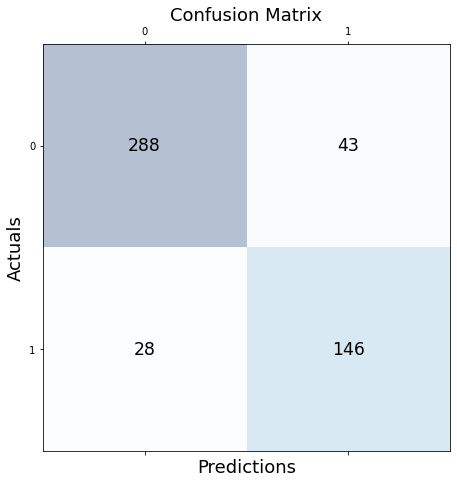

In [25]:
confusion_matrix_visualization(y_test, SVM.predict(X_test))

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, SVM.predict(X_test)).ravel()
# Type I error
type1_svm = 1- (tn / (tn+fp))

# Type II error
type2_svm = 1 - (tp / (tp+fn))

# Type I error and Type II error of Linear Discriminant Analysis

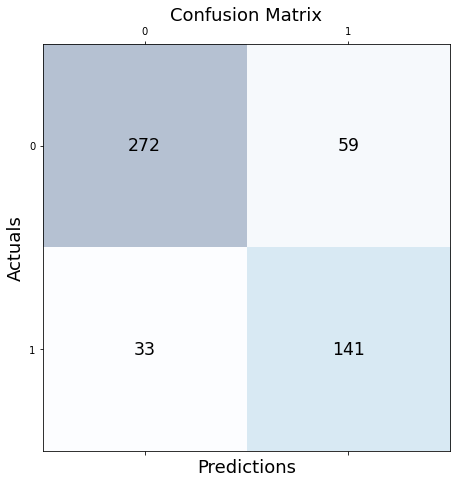

In [27]:
confusion_matrix_visualization(y_test, LDA.predict(X_test))

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, LDA.predict(X_test)).ravel()
# Type I error
type1_lda = 1- (tn / (tn+fp))

# Type II error
type2_lda = 1 - (tp / (tp+fn))

# Type I error and Type II error of Random Forest

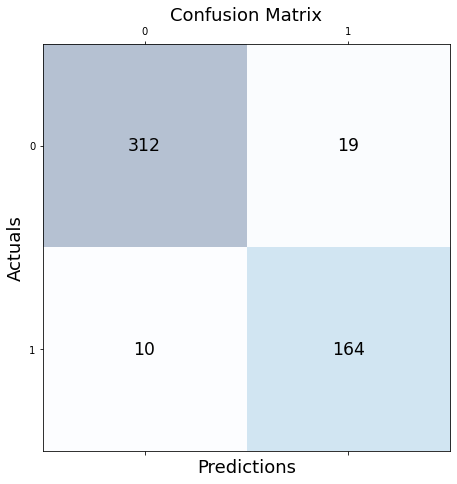

In [29]:
confusion_matrix_visualization(y_test, y_pred)

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Type I error
type1_rf = 1- (tn / (tn+fp))

# Type II error
type2_rf = 1 - (tp / (tp+fn))

In [31]:
result = {'Accurancy': [accuracy_score(y_true= y_test, y_pred= logr.predict(X_test)), accuracy_score(y_true= y_test, y_pred= xgb.predict(X_test)), 
                        accuracy_score(y_true= y_test, y_pred= SVM.predict(X_test)), accuracy_score(y_true= y_test, y_pred= LDA.predict(X_test)), 
                        accuracy_score(y_true= y_test, y_pred= y_pred)],
          'Precision': [precision_score(y_true= y_test, y_pred= logr.predict(X_test)), precision_score(y_true= y_test, y_pred= xgb.predict(X_test)), 
                        precision_score(y_true= y_test, y_pred= SVM.predict(X_test)), precision_score(y_true= y_test, y_pred= LDA.predict(X_test)), 
                        precision_score(y_true= y_test, y_pred= y_pred)],
          'Recall': [recall_score(y_true= y_test, y_pred= logr.predict(X_test)), recall_score(y_true= y_test, y_pred= xgb.predict(X_test)), 
                     recall_score(y_true= y_test, y_pred= SVM.predict(X_test)), recall_score(y_true= y_test, y_pred= LDA.predict(X_test)), 
                     recall_score(y_true= y_test, y_pred= y_pred)],
          'F1-score': [f1_score(y_true= y_test, y_pred= logr.predict(X_test)), f1_score(y_true= y_test, y_pred= xgb.predict(X_test)), 
                       f1_score(y_true= y_test, y_pred= SVM.predict(X_test)), f1_score(y_true= y_test, y_pred= LDA.predict(X_test)), 
                       f1_score(y_true= y_test, y_pred= y_pred)],
          '% Error type I': [type1_logr, type1_xgb, type1_svm, type1_lda, type1_rf],
          '% Error type II': [type2_logr, type2_xgb, type2_svm, type2_lda, type2_rf]}
result_table = pd.DataFrame(result, index= ['Logistic Regression', 'XGBoost', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Random Forest'])
result_table

,Accurancy,Precision,Recall,F1-score,% Error type I,% Error type II
Logistic Regression,0.74,0.60,0.70,0.65,0.24,0.30
XGBoost,0.95,0.92,0.95,0.94,0.05,0.05
Support Vector Machine,0.86,0.77,0.84,0.80,0.13,0.16
Linear Discriminant Analysis,0.82,0.70,0.81,0.75,0.18,0.19
Random Forest,0.94,0.90,0.94,0.92,0.06,0.06


## SHAP values

In [32]:
import shap

In [33]:
explainer_xg = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xg(X_train)

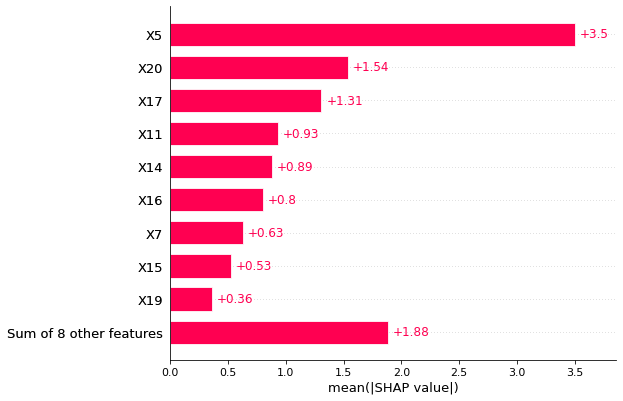

In [34]:
shap.plots.bar(shap_values_xgb)

In [35]:
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf(X_train)

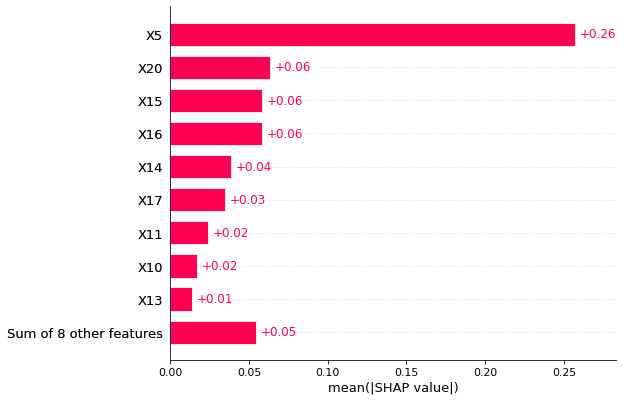

In [36]:
shap.plots.bar(shap_values_rf)

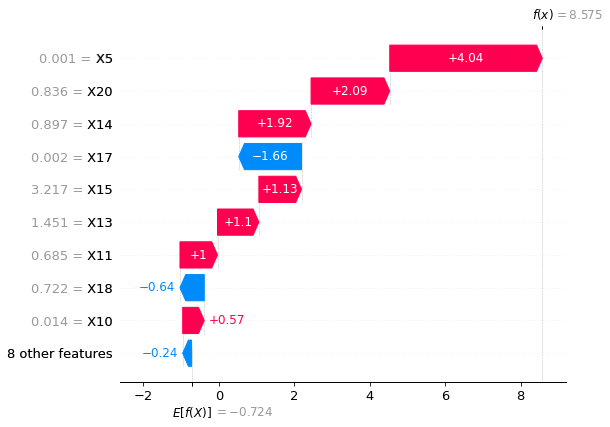

In [37]:
shap.plots.waterfall(shap_values_xgb[0])

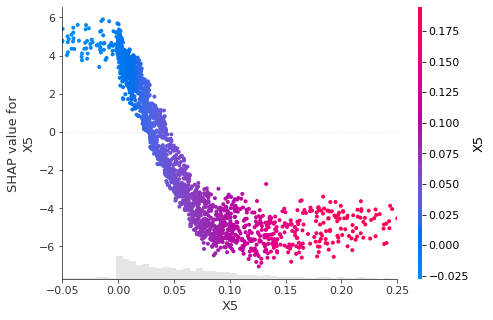

In [38]:
#ROA
shap.plots.scatter(shap_values_xgb[:,"X5"], color=shap_values_xgb[:, 'X5'], xmin= -0.05, xmax= 0.25)

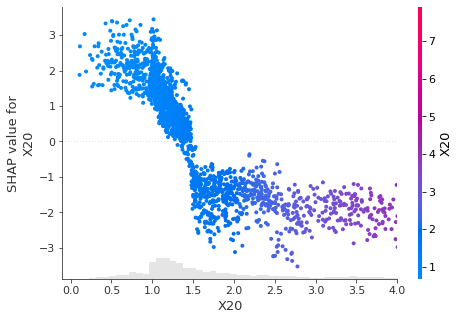

In [39]:
#Liquidity
shap.plots.scatter(shap_values_xgb[:,"X20"], color=shap_values_xgb[:, 'X20'], xmin= -0.1, xmax= 4)

In [41]:
shap.initjs()
shap.plots.force(shap_values_xgb[0])